In [2]:
import kaggle
!kaggle datasets download -d alexandrakim2201/spotify-dataset

Dataset URL: https://www.kaggle.com/datasets/alexandrakim2201/spotify-dataset
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
spotify-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip -o spotify-dataset.zip

Archive:  spotify-dataset.zip
  inflating: DATASET.csv             


In [4]:

import pandas as pd

# Load only the first 50,000 rows to avoid memory crash
df = pd.read_csv("DATASET.csv", header=None, nrows=50000)

In [5]:
df.columns = ['review', 'sentiment']


In [6]:

# Display the first few rows of the dataset
df.head()

,review,sentiment
0,Review,label
1,"Great music service, the audio is high quality...",POSITIVE
2,Please ignore previous negative rating. This a...,POSITIVE
3,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
4,Really buggy and terrible to use as of recently,NEGATIVE


In [7]:
# Remove the first row (probably header row inside the data)
df = df.drop(index=0).reset_index(drop=True)

# Build text from positive reviews
positive_text = " ".join([
    str(x) for x in df[df['sentiment'] == 'POSITIVE']['review']
    if pd.notnull(x)
])

# Build text from negative reviews
negative_text = " ".join([
    str(x) for x in df[df['sentiment'] == 'NEGATIVE']['review']
    if pd.notnull(x)
])

In [8]:
df.head()

,review,sentiment
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE


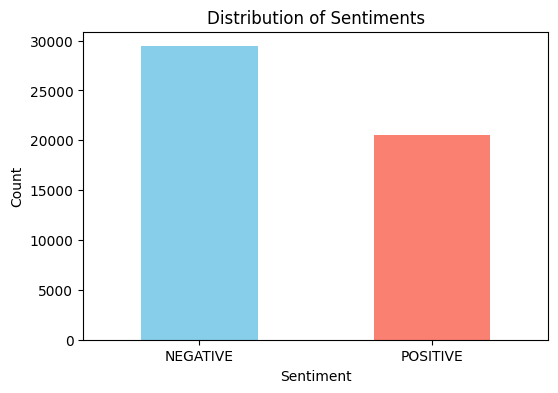

In [9]:

import matplotlib.pyplot as plt

# Count positive and negative reviews
sentiment_counts = df['sentiment'].value_counts()

# Plot a bar chart
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [10]:
from google.colab import files

# Upload an image file (e.g. PNG) to be used as a mask
uploaded = files.upload()

Saving spotify.png to spotify (8).png


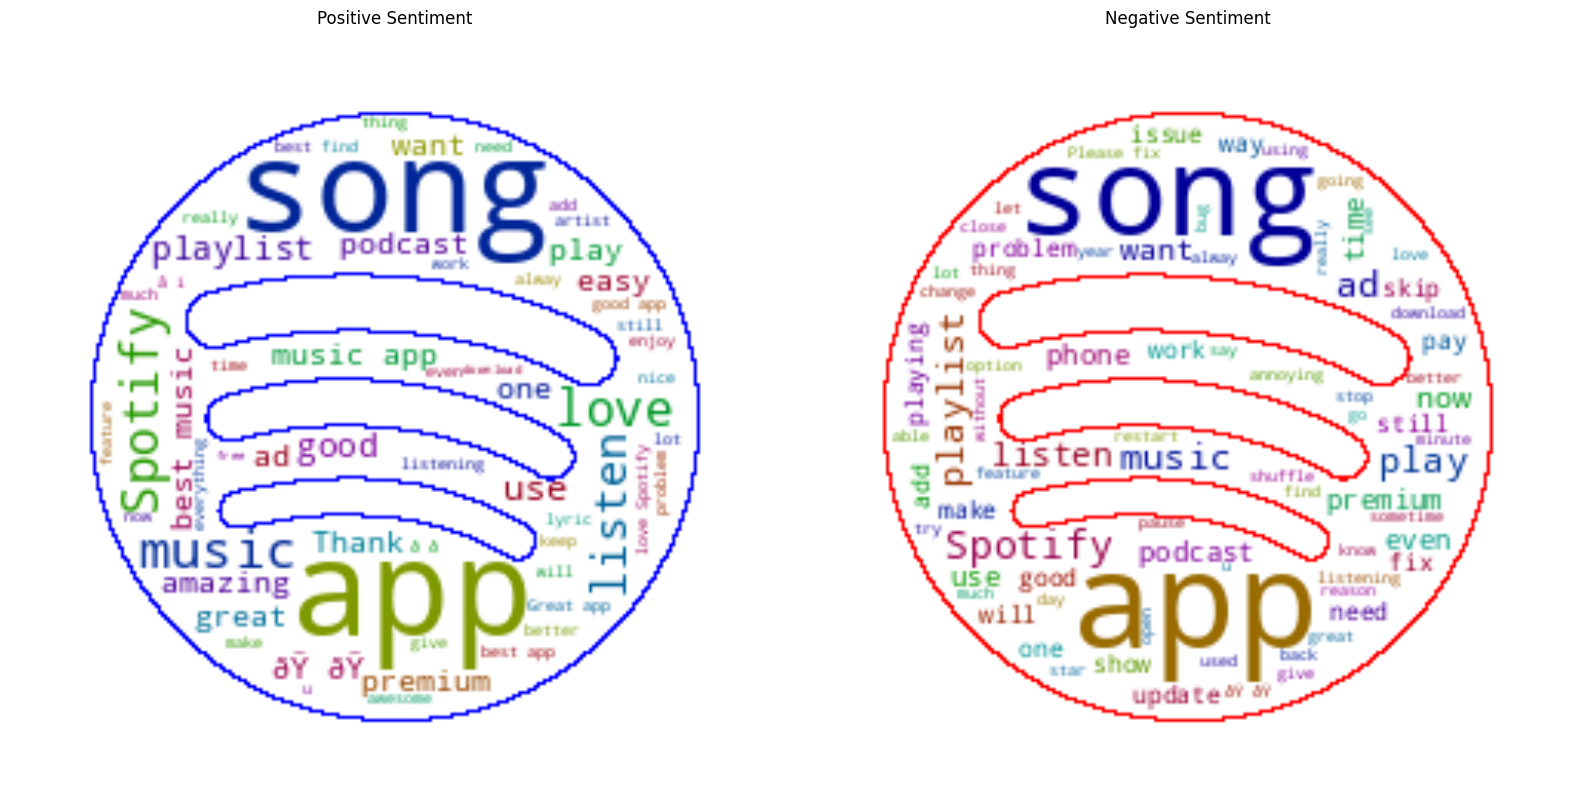

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd

import random

def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    return "hsl({}, 100%, 30%)".format(random.randint(0, 360))


# Load the mask
mask = np.array(Image.open("spotify.png"))

# Convert each review to string and drop missing values
positive_text = " ".join(str(x) for x in df[df['sentiment'] == 'POSITIVE']['review'] if pd.notnull(x))
negative_text = " ".join(str(x) for x in df[df['sentiment'] == 'NEGATIVE']['review'] if pd.notnull(x))

# Generate positive word cloud
positive_wc = WordCloud(
    background_color='white',
    mask=mask,
    contour_color='blue',
    contour_width=1,
    color_func=random_color_func
).generate(positive_text)

# Generate negative word cloud
negative_wc = WordCloud(
    background_color='white',
    mask=mask,
    contour_color='red',
    contour_width=1,
    color_func=random_color_func
).generate(negative_text)

# Show both side-by-side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment")

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment")

plt.tight_layout()
plt.show()


In [14]:
from collections import Counter
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Function to clean the text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove special characters and digits
    words = text.split()
    words = [word for word in words if word not in stop_words]  # remove stopwords
    return " ".join(words)

# Clean the review texts
df['cleaned_review'] = df['review'].apply(clean_text)

# Separate positive and negative reviews
positive_reviews = df[df['sentiment'] == 'POSITIVE']['cleaned_review']
negative_reviews = df[df['sentiment'] == 'NEGATIVE']['cleaned_review']

# Count word frequencies
positive_words = " ".join(positive_reviews).split()
negative_words = " ".join(negative_reviews).split()

positive_counts = Counter(positive_words)
negative_counts = Counter(negative_words)

# Print results
print("Top 5 words in positive reviews:")
print(positive_counts.most_common(5))

print("\nTop 5 words in negative reviews:")
print(negative_counts.most_common(5))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 5 words in positive reviews:
[('music', 10893), ('app', 10115), ('spotify', 5892), ('love', 5349), ('songs', 4291)]

Top 5 words in negative reviews:
[('app', 18387), ('songs', 9840), ('music', 9709), ('song', 9294), ('spotify', 8876)]
